### test

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import pickle
from sklearn.model_selection import train_test_split
import dataProcess as dp
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from scipy.ndimage.measurements import label

%matplotlib inline


In [2]:
clf = joblib.load('../model/svmCar.pkl')
svc = clf['model']
X_scaler = clf['scaling']
parameter = clf['config']
cspace = parameter['color_space']
spatial_size = parameter['spatial_size']
hist_bins = parameter['hist_bins']
orient = parameter['orient']
pix_per_cell = parameter['pix_per_cell']
cell_per_block = parameter['cell_per_block']
hog_channel = parameter['hog_channel']
spatial_feat = parameter['spatial_feat']
hist_feat = parameter['hist_feat']
hog_feat = parameter['hog_feat']
print(parameter)

{'pix_per_cell': 8, 'hist_bins': 16, 'cell_per_block': 1, 'hog_feat': True, 'spatial_size': (16, 16), 'color_space': 'YCrCb', 'hist_feat': True, 'orient': 9, 'spatial_feat': True, 'hog_channel': 'ALL'}


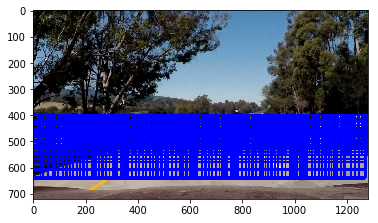

In [36]:
img = mpimg.imread('../test_images/test5.jpg')
img = img.astype(np.float32)/255
windowsList = dp.scaledWindows(img)
imgAllBox = dp.draw_boxes(img, windowsList, color=(0,0,1))
plt.imshow(imgAllBox)


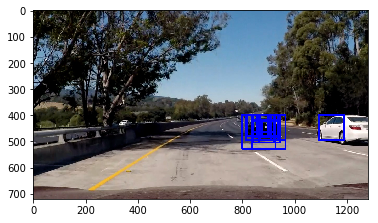

In [37]:
hot_windows = dp.search_windows(img, windowsList, svc, X_scaler, color_space=cspace, 
                             spatial_size=spatial_size, hist_bins=hist_bins, 
                             orient=orient, pix_per_cell=pix_per_cell, 
                             cell_per_block=cell_per_block, 
                             hog_channel=hog_channel, spatial_feat=spatial_feat, 
                             hist_feat=hist_feat, hog_feat=hog_feat)                       
imgBox = dp.draw_boxes(img, hot_windows,color=(0,0,1))
plt.imshow(imgBox)

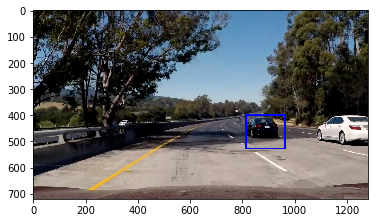

In [38]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)
heat = dp.add_heat(heat,hot_windows)
# plt.imshow(heat,cmap='hot')

# Apply threshold to help remove false positives
heat = dp.apply_threshold(heat,1)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
# Find final boxes from heatmap using label function
labels = label(heatmap)
# plt.imshow(labels[0], cmap='gray')
draw_img = dp.draw_labeled_bboxes(np.copy(img), labels)
# print (draw_img)
plt.imshow(draw_img)

In [14]:
def pipeline(img):
    img = img.astype(np.float32)/255
    windowsList = dp.scaledWindows(img)
    hot_windows = dp.search_windows(img, windowsList, svc, X_scaler, color_space=cspace, 
                             spatial_size=spatial_size, hist_bins=hist_bins, 
                             orient=orient, pix_per_cell=pix_per_cell, 
                             cell_per_block=cell_per_block, 
                             hog_channel=hog_channel, spatial_feat=spatial_feat, 
                             hist_feat=hist_feat, hog_feat=hog_feat)                       
    imgBox = dp.draw_boxes(img, hot_windows,color=(0,0,1))
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    heat = dp.add_heat(heat,hot_windows)
    # Apply threshold to help remove false positives
    heat = dp.apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)  
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = dp.draw_labeled_bboxes(np.copy(img), labels)
    return draw_img*255

In [15]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

output = '../test_output.mp4'
clip1 = VideoFileClip("../test_video.mp4")
vehicleDetection = clip1.fl_image(pipeline) #NOTE: this function expects color images!!

%time vehicleDetection.write_videofile (output)

[MoviePy] >>>> Building video ../test_output.mp4
[MoviePy] Writing audio in test_outputTEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 2117.39it/s]

[MoviePy] Done.
[MoviePy] Writing video ../test_output.mp4



 97%|█████████▋| 38/39 [01:47<00:02,  2.91s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test_output.mp4 

CPU times: user 1min 46s, sys: 276 ms, total: 1min 47s
Wall time: 1min 47s


In [16]:
output = '../project_output.mp4'
clip1 = VideoFileClip("../project_video.mp4")
vehicleDetection = clip1.fl_image(pipeline) #NOTE: this function expects color images!!

%time vehicleDetection.write_videofile (output)

[MoviePy] >>>> Building video ../project_output.mp4
[MoviePy] Writing audio in project_outputTEMP_MPY_wvf_snd.mp3


100%|██████████| 1112/1112 [00:00<00:00, 2911.57it/s]

[MoviePy] Done.
[MoviePy] Writing video ../project_output.mp4



100%|█████████▉| 1260/1261 [59:19<00:02,  2.92s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../project_output.mp4 

CPU times: user 59min 6s, sys: 9.65 s, total: 59min 16s
Wall time: 59min 20s
